In [9]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
#reading the data 
data=pd.read_csv('/home/labexam/Desktop/spam/spam_or_not_spam.csv')
data.head(15)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [5]:
#details of the data
data.shape

(3000, 2)

In [8]:
data.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
0      2500   2445                     url URL date not supplied URL    10
1       499    427  lowest rates available for term life insurance...    5

<AxesSubplot:xlabel='label', ylabel='count'>

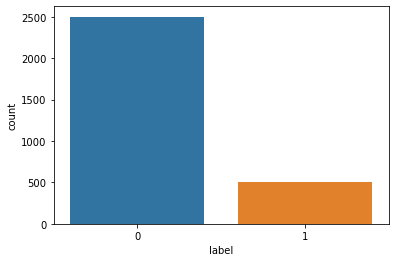

In [10]:
sns.countplot(x='label',data=data)

In [19]:
#checking for nnan values
data.isna().sum()
data=data.dropna()


In [20]:
data.isna().sum()

email    0
label    0
dtype: int64

In [21]:
#splitting into test train data
x_train, x_test, y_train, y_test = train_test_split(data['email'],data['label'],test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2399,)
(600,)
(2399,)
(600,)


In [22]:
x_train.sample(15)

1493     would someone please enlighten me on dependen...
1178     mcmasjc URL said NUMBER you can learn to use ...
2810     這是委託由專業廣告公司代發勿直接回信無法接收 呦 好朋友啊 許多人能力沒有比你好 因為掌握...
66       with our telecoms partner bumblebee don t get...
1088    mark derricutt wrote hiya i just myself an rpm...
1698     choose something with a different prefix than...
2030    url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...
793      in essence hindsight justification the progre...
1248    once upon a time brian wrote i have a fresh ne...
1360    justin mason wrote what do you all think are w...
1432     zeek said this was thoroughly confusing but b...
851      wow if they put a vrml front end on it it wou...
994      you re probably running exmh on a local machi...
606      from yyyy URL mailto yyyy URL sent tuesday se...
2670    lowest rates available for term life insurance...
Name: email, dtype: object

In [25]:
#converting emails to vector
cv=CountVectorizer()
word_count=cv.fit_transform(x_train.values)
print(word_count)

  (0, 26732)	2
  (0, 5567)	1
  (0, 19142)	9
  (0, 30741)	10
  (0, 5213)	3
  (0, 30054)	1
  (0, 27195)	5
  (0, 27540)	1
  (0, 27115)	8
  (0, 15230)	1
  (0, 25337)	4
  (0, 26596)	1
  (0, 26658)	1
  (0, 17957)	31
  (0, 21474)	1
  (0, 26330)	1
  (0, 25547)	4
  (0, 19783)	1
  (0, 12787)	2
  (0, 24975)	2
  (0, 30626)	2
  (0, 9470)	2
  (0, 19790)	2
  (0, 28822)	2
  (0, 1051)	3
  :	:
  (2398, 17160)	1
  (2398, 3690)	1
  (2398, 10533)	1
  (2398, 26945)	1
  (2398, 5079)	1
  (2398, 3019)	1
  (2398, 2907)	1
  (2398, 5214)	1
  (2398, 10793)	1
  (2398, 1388)	1
  (2398, 20504)	1
  (2398, 27348)	1
  (2398, 3054)	1
  (2398, 11506)	1
  (2398, 5893)	1
  (2398, 20345)	1
  (2398, 19315)	1
  (2398, 7123)	1
  (2398, 29920)	1
  (2398, 12317)	1
  (2398, 10134)	1
  (2398, 29831)	1
  (2398, 9949)	1
  (2398, 6818)	1
  (2398, 17814)	1


In [26]:
word_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
#training the model
model = MultinomialNB()
model.fit(word_count, y_train)


MultinomialNB()

In [28]:
#pre-test ham case
email_ham=['Hey man whats up?']
email_ham_count=cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [29]:
#pre-test spam case
email_spam=['Our records show you overpaid for (a product or service). Kindly supply your bank routing and account number to receive your refund.']
email_spam_count=cv.transform(email_spam)
model.predict(email_spam_count)

array([1])

In [30]:
#testing with test data
test_count = cv.transform(x_test)
model.score(test_count, y_test)

0.99